### 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

np.random.seed(2016122032) 

In [2]:
card = pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# 결측치 확인 => 결측치 없음
card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# class가 1인 비중 확인 => 전체 284807개의 data 중 492개 
card[card.Class==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [5]:
492/284807

0.001727485630620034

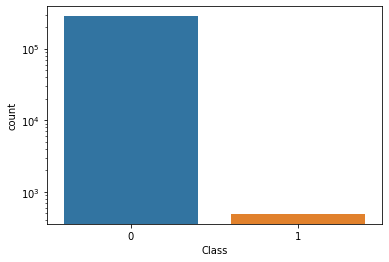

In [6]:
barchart=sns.countplot(x='Class',data=card);
barchart.set_yscale('log')

In [7]:
estimators=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X = card[estimators]
y = card['Class']

### 모델링하는 함수

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)       
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
    
#평가 지표
def metrics(y_test,pred):      
    recall = recall_score(y_test,pred)    
    roc_score = roc_auc_score(y_test,pred,average='macro')    
    print('재현율(Recall) : {0:.2f}'.format(recall))
    print('AUROC : {0:.2f}'.format(roc_score))

### Logistic Regression

In [32]:
print("학습 데이터 feature(X)/class(y) 형태: ", X_train.shape, y_train.shape)
print("검증 데이터 feature(X)/class(y) 형태: ", X_test.shape, y_test.shape)

학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
검증 데이터 feature(X)/class(y) 형태:  (85443, 30) (85443,)


In [9]:
# logistic

lr = LogisticRegression(random_state=2016122032)
modeling(lr,X_train,X_test,y_train,y_test)
y_pred=lr.predict(X_test)

재현율(Recall) : 0.65
AUROC : 0.83


C:\Users\Hyuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


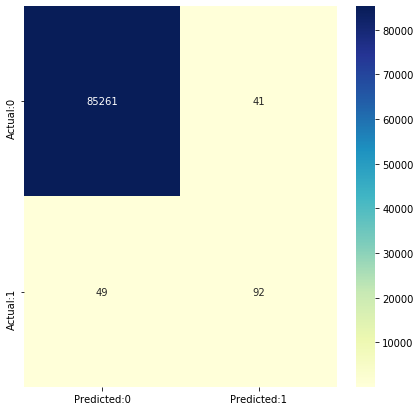

In [10]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### UnderSampling -> 진짜 seed에 따라 다르게 나온다. 몇번 돌려보고 평균 및 표준편차 구해서 변동성 심한지 봐야할 듯 하다.

In [11]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=2016122032, replacement=False)
X_train_under,y_train_under = under.fit_resample(X_train,y_train)
print('UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태: ', X_train.shape, y_train.shape)
print('UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태: ', X_train_under.shape, y_train_under.shape)
print('UnderSampling 적용 후 class 값 분포: \n', pd.Series(y_train_under).value_counts())

UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태:  (702, 30) (702,)
UnderSampling 적용 후 class 값 분포: 
 1    351
0    351
Name: Class, dtype: int64


In [12]:
lr2 = LogisticRegression(random_state=2016122032)
modeling(lr2,X_train_under,X_test,y_train_under,y_test)
y_pred2 = lr2.predict(X_test)

재현율(Recall) : 0.93
AUROC : 0.94


C:\Users\Hyuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
under22 = RandomUnderSampler(random_state=1, replacement=False)
X_train_under,y_train_under = under22.fit_resample(X_train,y_train)
print('UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태: ', X_train.shape, y_train.shape)
print('UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태: ', X_train_under.shape, y_train_under.shape)
print('UnderSampling 적용 후 class 값 분포: \n', pd.Series(y_train_under).value_counts())

UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태:  (702, 30) (702,)
UnderSampling 적용 후 class 값 분포: 
 1    351
0    351
Name: Class, dtype: int64


In [14]:
lr2 = LogisticRegression(random_state=2016122032)
modeling(lr2,X_train_under,X_test,y_train_under,y_test)
y_pred2 = lr2.predict(X_test)

재현율(Recall) : 0.91
AUROC : 0.93


In [15]:
under22 = RandomUnderSampler(random_state=3, replacement=False)
X_train_under,y_train_under = under22.fit_resample(X_train,y_train)
print('UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태: ', X_train.shape, y_train.shape)
print('UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태: ', X_train_under.shape, y_train_under.shape)
print('UnderSampling 적용 후 class 값 분포: \n', pd.Series(y_train_under).value_counts())

UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태:  (702, 30) (702,)
UnderSampling 적용 후 class 값 분포: 
 1    351
0    351
Name: Class, dtype: int64


In [16]:
lr2 = LogisticRegression(random_state=2016122032)
modeling(lr2,X_train_under,X_test,y_train_under,y_test)
y_pred2 = lr2.predict(X_test)

재현율(Recall) : 0.91
AUROC : 0.94


In [17]:
under22 = RandomUnderSampler(random_state=4, replacement=False)
X_train_under,y_train_under = under22.fit_resample(X_train,y_train)
print('UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태: ', X_train.shape, y_train.shape)
print('UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태: ', X_train_under.shape, y_train_under.shape)
print('UnderSampling 적용 후 class 값 분포: \n', pd.Series(y_train_under).value_counts())

UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태:  (702, 30) (702,)
UnderSampling 적용 후 class 값 분포: 
 1    351
0    351
Name: Class, dtype: int64


In [18]:
lr2 = LogisticRegression(random_state=2016122032)
modeling(lr2,X_train_under,X_test,y_train_under,y_test)
y_pred2 = lr2.predict(X_test)

재현율(Recall) : 0.94
AUROC : 0.94


C:\Users\Hyuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
under22 = RandomUnderSampler(random_state=5, replacement=False)
X_train_under,y_train_under = under22.fit_resample(X_train,y_train)
print('UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태: ', X_train.shape, y_train.shape)
print('UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태: ', X_train_under.shape, y_train_under.shape)
print('UnderSampling 적용 후 class 값 분포: \n', pd.Series(y_train_under).value_counts())

UnderSampling 적용 전 학습 데이터 feature(X)/class(y) 형태:  (199364, 30) (199364,)
UnderSampling 적용 후 학습 데이터 feature(X)/class(y) 형태:  (702, 30) (702,)
UnderSampling 적용 후 class 값 분포: 
 1    351
0    351
Name: Class, dtype: int64


In [20]:
lr2 = LogisticRegression(random_state=2016122032)
modeling(lr2,X_train_under,X_test,y_train_under,y_test)
y_pred2 = lr2.predict(X_test)

재현율(Recall) : 0.87
AUROC : 0.91


In [21]:
recall = [0.93, 0.91, 0.91, 0.94, 0.87]
auroc = [0.94,0.93,0.94,0.94, 0.91]

print("Mean of Recall = ", np.mean(recall))
print("Mean of AUROC = ", np.mean(auroc))
print("S.D of Recall = ", np.sqrt(np.var(recall)))
print("S.D of AUROC = ", np.sqrt(np.var(auroc)))


Mean of Recall =  0.9119999999999999
Mean of AUROC =  0.932
S.D of Recall =  0.023999999999999997
S.D of AUROC =  0.011661903789690566


In [22]:
print(0.024/0.912)
print(0.012/0.932)

0.02631578947368421
0.012875536480686695


### OverSampling

In [23]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=2016122032)
X_train_over,y_train_over = over.fit_resample(X_train,y_train)
print('OverSampling 적용 전 학습 데이터 feature/class 형태: ', X_train.shape, y_train.shape)
print('OverSampling 적용 후 학습 데이터 feature/class 형태: ', X_train_over.shape, y_train_over.shape)
print('OverSampling 적용 후 class 값 분포: \n', pd.Series(y_train_over).value_counts())

OverSampling 적용 전 학습 데이터 feature/class 형태:  (199364, 30) (199364,)
OverSampling 적용 후 학습 데이터 feature/class 형태:  (398026, 30) (398026,)
OverSampling 적용 후 class 값 분포: 
 1    199013
0    199013
Name: Class, dtype: int64


In [24]:
lr3 = LogisticRegression(random_state=2016122032)
modeling(lr3,X_train_over,X_test,y_train_over,y_test)
y_pred3 = lr3.predict(X_test)

재현율(Recall) : 0.88
AUROC : 0.92


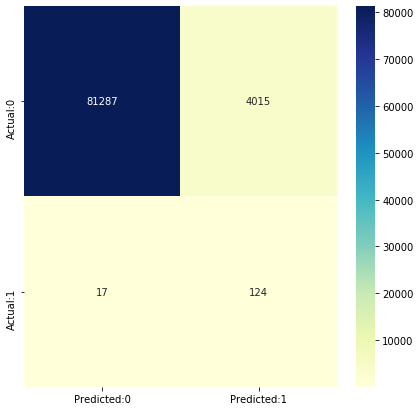

In [25]:
cm=confusion_matrix(y_test,y_pred3)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2016122032)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습 데이터 feature/class 형태: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습 데이터 feature/class 형태: ', X_train_smote.shape, y_train_smote.shape)
print('SMOTE 적용 후 class 값 분포: \n', pd.Series(y_train_smote).value_counts())

SMOTE 적용 전 학습 데이터 feature/class 형태:  (199364, 30) (199364,)
SMOTE 적용 후 학습 데이터 feature/class 형태:  (398026, 30) (398026,)
SMOTE 적용 후 class 값 분포: 
 1    199013
0    199013
Name: Class, dtype: int64


In [27]:
# smote 적용 후 logistic

lr4 = LogisticRegression(random_state=2016122032)
modeling(lr4,X_train_smote,X_test,y_train_smote,y_test)
y_pred4=lr4.predict(X_test)

재현율(Recall) : 0.90
AUROC : 0.94


C:\Users\Hyuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


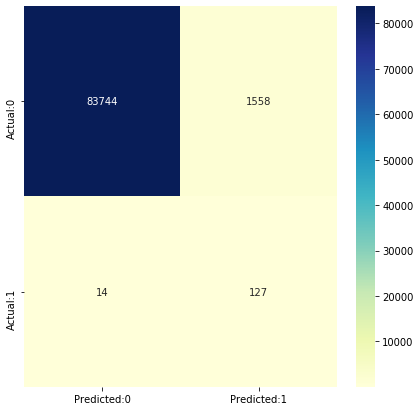

In [28]:
# smote 적용 후 logistic 의 confusion matrix

cm=confusion_matrix(y_test,y_pred4)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Under Sampling + SMOTE

In [29]:
under2 = RandomUnderSampler(sampling_strategy=0.1,random_state=2016122032, replacement=False)
X_train_under2,y_train_under2 = under2.fit_resample(X_train,y_train)
smote2 = SMOTE(random_state=2016122032)
X_train_smote2,y_train_smote2 = smote2.fit_resample(X_train_under2,y_train_under2)
print('UnderSampling+SMOTE 적용 전 학습 데이터 feature/class 형태: ', X_train.shape, y_train.shape)
print('UnderSampling+SMOTE 적용 후 학습 데이터 feature/class 형태: ', X_train_smote2.shape, y_train_smote2.shape)
print('UnderSampling+SMOTE 적용 후 class 값 분포: \n', pd.Series(y_train_smote2).value_counts())

UnderSampling+SMOTE 적용 전 학습 데이터 feature/class 형태:  (199364, 30) (199364,)
UnderSampling+SMOTE 적용 후 학습 데이터 feature/class 형태:  (7020, 30) (7020,)
UnderSampling+SMOTE 적용 후 class 값 분포: 
 1    3510
0    3510
Name: Class, dtype: int64


In [30]:
lr5 = LogisticRegression(random_state=2016122032)
modeling(lr5,X_train_smote2,X_test,y_train_smote2,y_test)
y_pred5=lr5.predict(X_test)

재현율(Recall) : 0.92
AUROC : 0.95


C:\Users\Hyuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


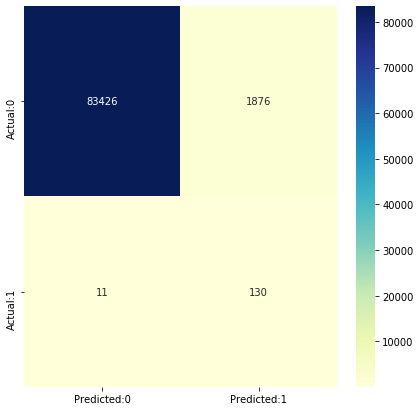

In [31]:
cm=confusion_matrix(y_test,y_pred5)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");